<a href="https://colab.research.google.com/github/cherkashin-py/dap-2024/blob/main/rep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа №6. Линейная регрессия**

**Задача 1. Выведете описание набора данных и наименование признаков.**

In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

print("Описание набора данных:")
print(diabetes['DESCR'])
print("\nНаименования признаков:")
print(diabetes['feature_names'])


Описание набора данных:
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 fe

**Задача 2. Из загруженного набора данных создайте DataFrame, содержащий как признаки, так и целевое значение. Выведите первые 5 строк набора.**

In [ ]:
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()

# Создание DataFrame из признаков и целевого значения
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

print("Первые 5 строк набора данных:")
print(data.head())


Первые 5 строк набора данных:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


**Задача 3. Выведете информацию о типах данных в наборе. Имеются ли в наборе категориальные признаки? Имеются ли в наборе данные имеющие значение null?**

In [ ]:
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()

# Создание DataFrame
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

print("\nИнформация о наборе данных:")
print(data.info())
print("\nЕсть ли пропущенные значения?")
print(data.isnull().sum())

# Проверка наличия категориальных признаков
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print("\nКатегориальные признаки:")
print(categorical_columns if len(categorical_columns) > 0 else "В наборе данных нет категориальных признаков.")




Информация о наборе данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

Есть ли пропущенные значения?
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

Категориальные признаки:
В наборе данных нет категориальных признаков.


**Задача 4. Постройте матрицу корреляции.**

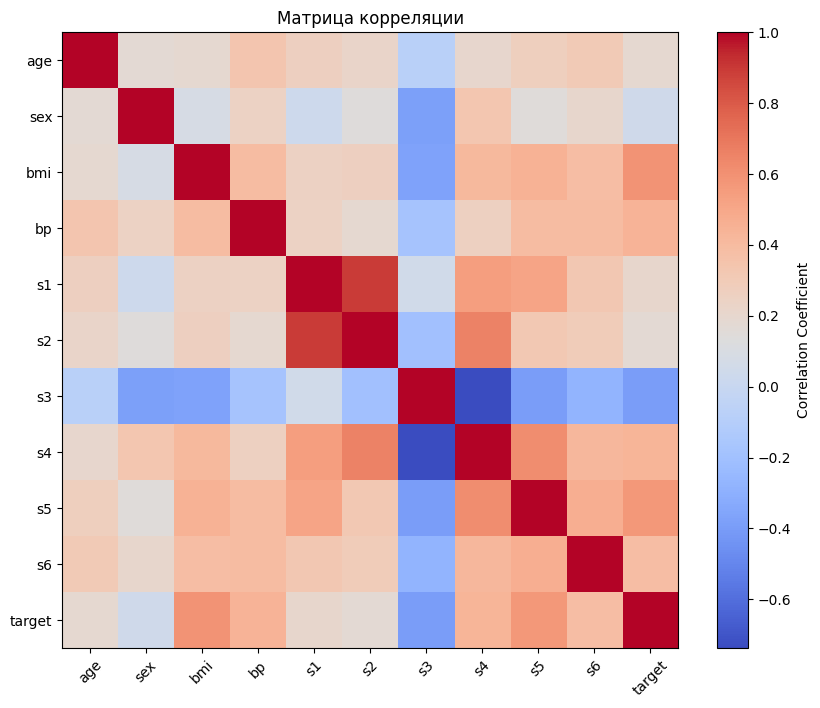

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Создание DataFrame
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

# Вычисление матрицы корреляции
correlation_matrix = data.corr()

# Построение матрицы корреляции
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label="Correlation Coefficient")
plt.title("Матрица корреляции")
plt.xticks(range(len(data.columns)), data.columns, rotation=45)
plt.yticks(range(len(data.columns)), data.columns)
plt.show()


**Задача 5. Постройте диаграмму рассеяния целевого значение и признака, коэффициент корреляции которого с целевым значением, самый высокий.**

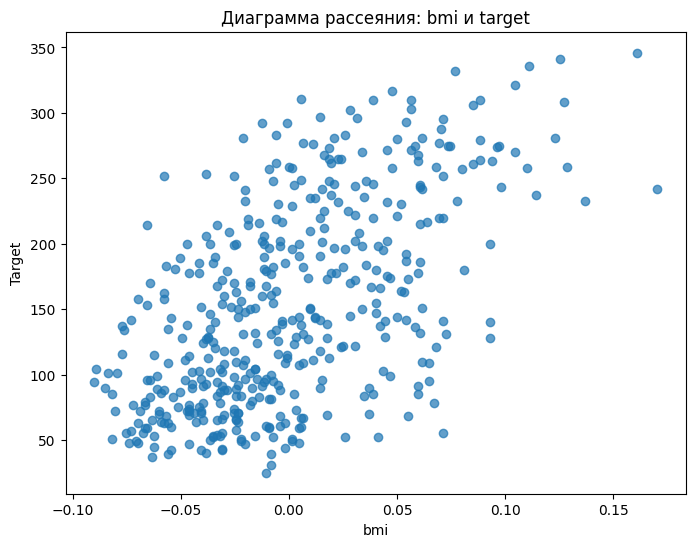

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
diabetes = datasets.load_diabetes()

# Создание DataFrame
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

# Вычисление корреляции с целевым значением
correlation_with_target = data.corr()['target'].drop('target')
most_correlated_feature = correlation_with_target.idxmax()

# Построение диаграммы рассеяния
plt.figure(figsize=(8, 6))
plt.scatter(data[most_correlated_feature], data['target'], alpha=0.7)
plt.title(f"Диаграмма рассеяния: {most_correlated_feature} и target")
plt.xlabel(most_correlated_feature)
plt.ylabel("Target")
plt.show()


**Задача 6. Сформируйте набор признаков (X) из 5 признаков с самым высоким коэффициентом корреляции с целевым значением. Сформируйте набор для целевого значения (y).**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
diabetes = datasets.load_diabetes()

# Создание DataFrame
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

# Отбор 5 признаков с наибольшей корреляцией
correlation_with_target = data.corr()['target'].drop('target')
top_5_features = correlation_with_target.abs().sort_values(ascending=False).head(5).index

# Формирование наборов X и y
X = data[top_5_features]
y = data['target']

print("Топ-5 признаков с самой высокой корреляцией с целевым значением:")
print(top_5_features.tolist())


Топ-5 признаков с самой высокой корреляцией с целевым значением:
['bmi', 's5', 'bp', 's4', 's3']


**Задача 7. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
diabetes = datasets.load_diabetes()

# Создание DataFrame
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

# Отбор признаков и целевого значения
X = data.drop(columns=['target'])
y = data['target']

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Размер обучающего набора: {X_train.shape}, тестового набора: {X_test.shape}")


Размер обучающего набора: (331, 10), тестового набора: (111, 10)


**Задача 8. Выполните обучение модели.**

In [ ]:
import sklearn

# Создание модели
model = LinearRegression()

# Обучение модели
model.fit(X_train, y_train)

print("Коэффициенты модели:", model.coef_)
print("Свободный член (intercept):", model.intercept_)


Коэффициенты модели: [  47.74968054 -241.99090728  531.97106288  381.56286182 -918.50290455
  508.25778252  116.95016447  269.4923028   695.80811712   26.32458203]
Свободный член (intercept): 151.6651755919933


**Задача 9. Расчитайте Root mean squared error (RMSE)**

In [ ]:
import sklearn
import numpy as np

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Вычисление RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 53.37


**Задача 10. Расчитайте R² (коэффициент детерминации)**

In [ ]:
import sklearn

# Вычисление R²
r2 = r2_score(y_test, y_pred)
print(f"R² (коэффициент детерминации): {r2:.2f}")


R² (коэффициент детерминации): 0.48
